In [ ]:
# https://github.com/NurudeenNajeem/machine-learning.git

In [1]:
import numpy as np
import pandas as pd 
import seaborn as  sn
from sklearn.model_selection import  train_test_split
from sklearn.metrics import  accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import  StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
diabetes_data = pd.read_csv("diabetes.csv")

In [3]:
diabetes_data.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Exploratory Data Analysis (EDA)
EDA is an approach to analyzing the dataset using graphical visualization techniques. It is also used to discover pattern, and trends, to check assumptions with the help of statiscal summaries and graphical visualization. 

In [5]:
diabetes_data.shape

(768, 9)

From this, we got to know that there are 768 rows of  data available and for
each row, we have 9 different  columns or features 

In [6]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


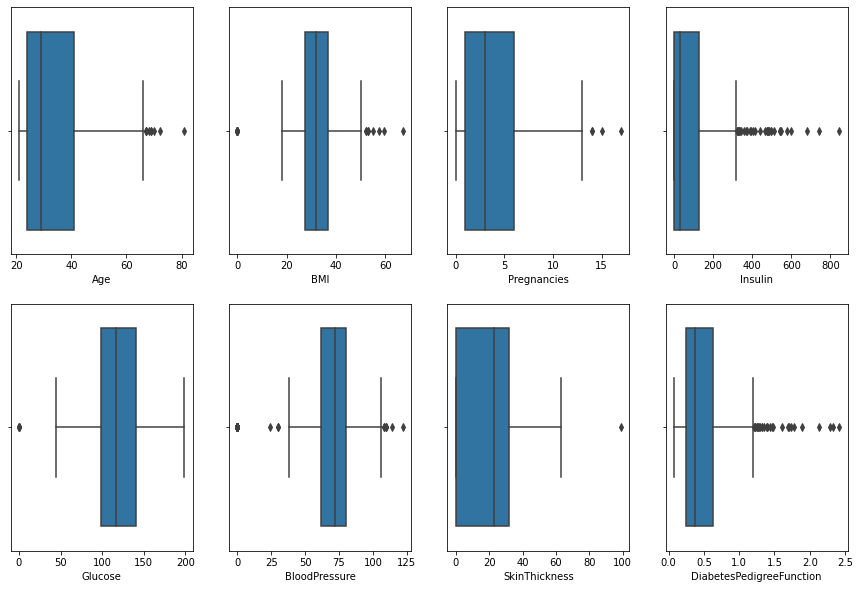

In [8]:
features = ["Age","BMI","Pregnancies","Insulin","Glucose","BloodPressure","SkinThickness","DiabetesPedigreeFunction"]
plt.figure(figsize = (15,10))
for i, col in enumerate(features):
     plt.subplot(2,4, i+1)
     sn.boxplot(diabetes_data[col])
plt.show()

There are outlier in all the columns

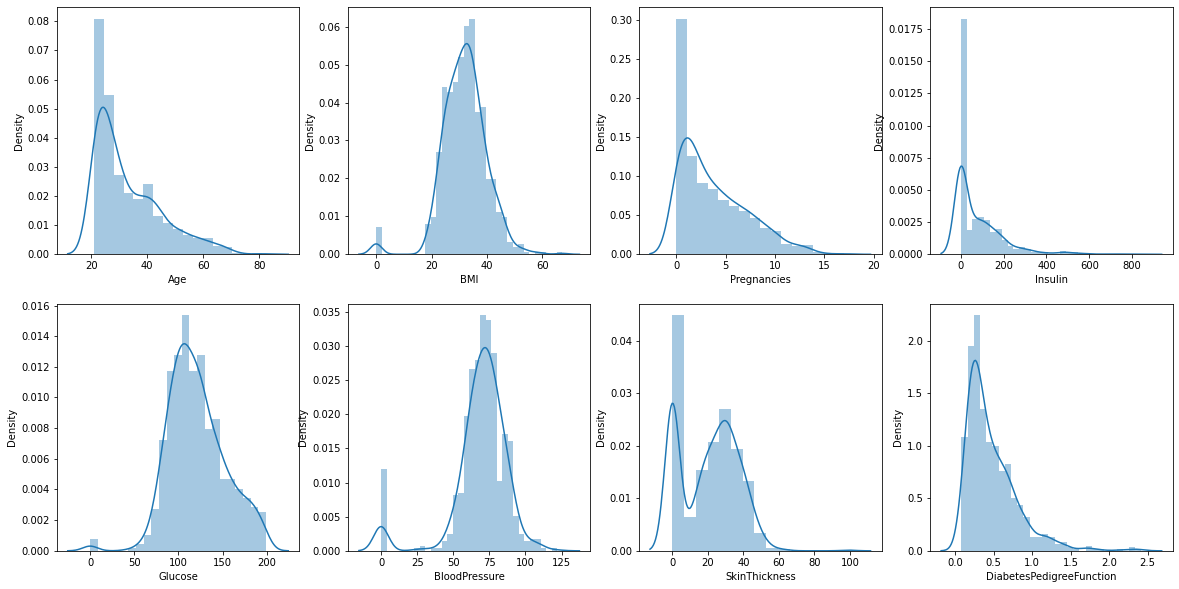

In [9]:
features = ["Age","BMI","Pregnancies","Insulin","Glucose","BloodPressure","SkinThickness","DiabetesPedigreeFunction"]
plt.subplots(figsize = (20,10))
for i, col in enumerate(features):
     plt.subplot(2,4, i+1)
     sn.distplot(diabetes_data[col])
plt.show()

Distribution plot of the Continuous Variable

<AxesSubplot:>

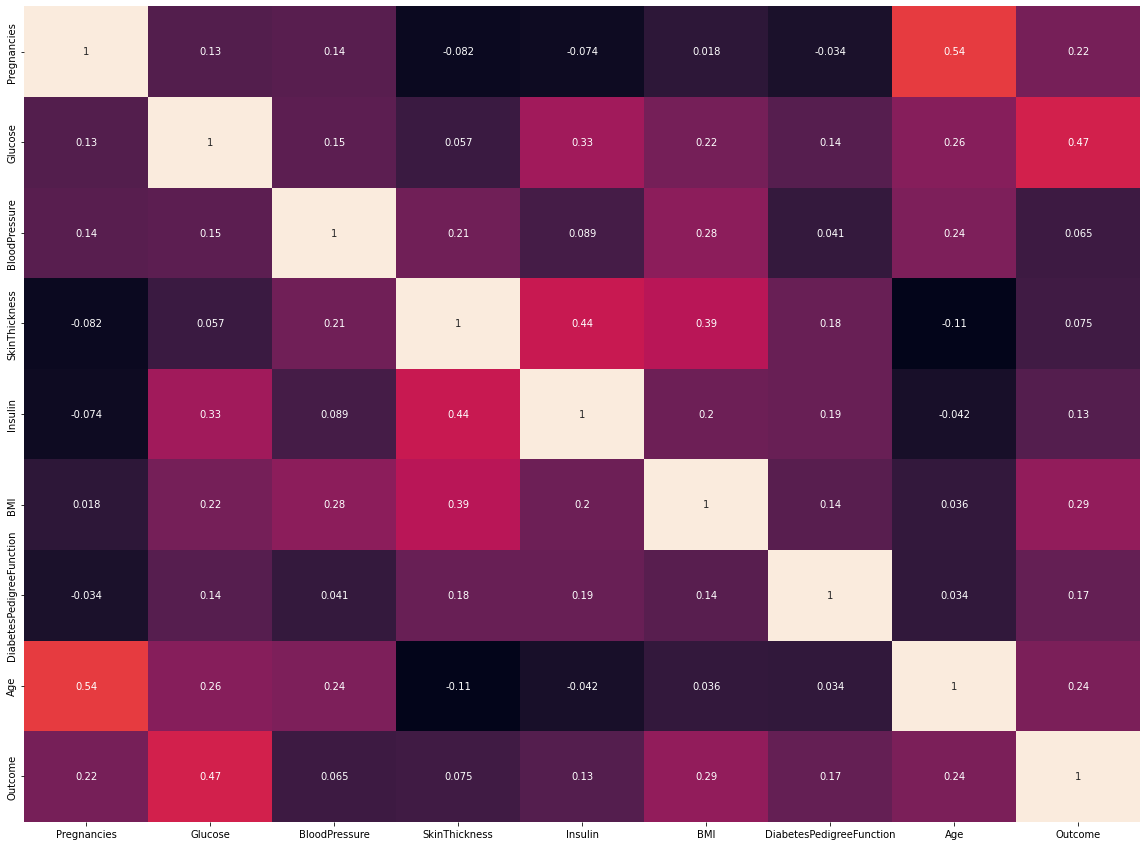

In [10]:
plt.figure(figsize= (20,15))
sn.heatmap(diabetes_data.corr(),annot=True, cbar= False)

In [11]:
diabetes_data.groupby("Outcome").sum()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,1649,54990,34092,9832,34396,15152.1,214.867,15595
1,1304,37857,18981,5940,26890,9418.2,147.534,9934


In [12]:
diabetes_data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [13]:
# Features selection and target variable
# X = Features Variable
# Y = Target Variables
X = diabetes_data.drop(columns="Outcome", axis=1)
Y = diabetes_data["Outcome"]

In [14]:
# Standardize data
scalar = StandardScaler()
scalar.fit(X)

StandardScaler()

In [15]:
standardized_data = scalar.transform(X)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


Training the dataset

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2 , random_state=2)

Training the dataset

In [17]:
model =  LogisticRegression()

In [18]:
model.fit(X_train,Y_train)

LogisticRegression()

In [19]:
X_train_predict = model.predict(X_train)
train_data_accuracy_score = accuracy_score(Y_train,X_train_predict)
print("The accuracy of the train data is ", train_data_accuracy_score )

The accuracy of the train data is  0.7768729641693811


In [20]:
X_test_predict = model.predict(X_test)
test_data_accuracy_score = accuracy_score(Y_test,X_test_predict)
print("The accuracy of the test data is ", test_data_accuracy_score )

The accuracy of the test data is  0.7662337662337663


Making a Predictive System

In [21]:
predicts = model.predict([[5,166,72,19,175,25.8,0.587,51]])
print(predicts)
if (predicts == 0) :
     print("The person has no diabetes")
else:
     print("The person has  a diabetes")


[1]
The person has  a diabetes
